## Week 4 Exercises

###<font color=green> Replace the name below with **your name**.

# Lise Meitner

<font color=purple> Lise Meitner, 1878 - 1968, *Austrian physicist and co-discoverer of nuclear fission. Only the second woman to graduate with a doctorate in Physics from the University of Vienna, she began her career working with chemist Otto Hahn at the University of Berlin, confined to the basement rather than his upstairs lab because she was a woman. Later, both Meitner and Hahn ran labs at the Kaiser Wilhelm Institute for Chemistry, but when Germany invaded Austria in 1938, she was forced to flee to Sweden. She continued to communicate with Hahn, and when Hahn and Fritz Strassman carried out an experiment that showed that a uranium nucleus bombarded with neutrons gave rise to a lighter element, barium, rather than a heavier one, they consulted Meitner. She carried out calculations and figured out, in discussions with her nephew Otto Frisch, that Hahn and Strassmann's experiment showed they had split the uranium nucleus. Only Otto Hahn won the 1944 Nobel prize in Chemistry - Meitner's contributions (including the Auger effect, discovered by Auger two years after her) were never acknowledged by the Nobel foundation.*

**1. Density and surface plots of more functions**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt, log, sin, cos, e, pi, arctan2
import scipy

(a) (10 points) Last week, you made density plots of the function $w(x, y) = \sin(r)$ where $r =\sqrt{x^2+y^2}$. Use similar code to make density plots of two new functions:
$$f(x,y) = \cos(\sqrt{x^2+y^2})\\
g(x,y) = \exp{-(x^2+y^2)}$$
The function $g(x, y)$ is a Gaussian - it should look like a rounded
peak centered on the origin.


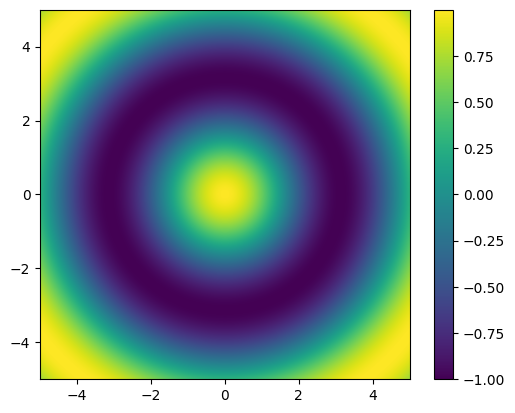

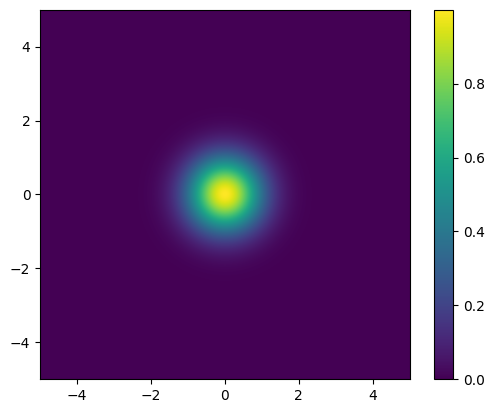

In [2]:
xVal = np.linspace(-5, 5, 1000)
yVal = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(xVal, yVal)
F = cos(sqrt(X**2 + Y**2))
G = e**(-(X*X + Y*Y))

plt.imshow(F, origin = 'lower', extent = [-5, 5, -5, 5])
plt.colorbar()
plt.show()
plt.imshow(G,extent = [-5, 5, -5, 5])
plt.colorbar()

plt.show()

b) (5 points) Make a density plot of the function
$$s(x,y) = \cos(\theta+\sqrt{x^2+y^2})$$

with $\theta=\arctan(y/x)$. Use the `arctan2(y,x)` function to compute
θ directly from y and x, rather than taking their quotient.
You should see a spiral pattern, rather than concentric rings as
with f(x, y) and g(x, y). Explain in a markdown cell where the
spiral pattern comes from.


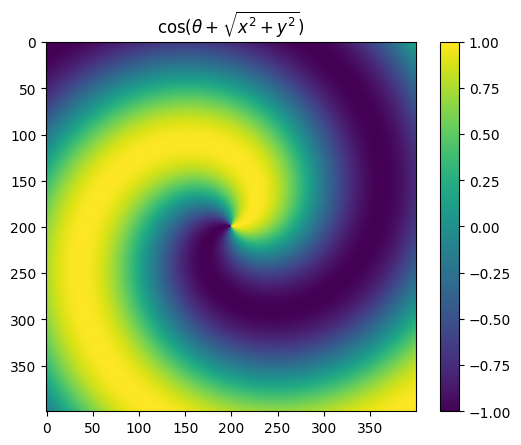

In [3]:
def graphS(x):
    xVal = np.linspace(-2*x, 2*x, 200*x)
    yVal = np.linspace(-2*x, 2*x, 200*x)
    X, Y = np.meshgrid(xVal, yVal)
    S = cos(arctan2(Y, X)+sqrt(X*X + Y*Y))
    plt.figure()
    plt.imshow(S)
    plt.colorbar()
    plt.title(r"$\cos({\theta} + \sqrt{x^{2}+y^{2}})$")
    plt.show()
graphS(2)


The spiral arises because of the relation to r and theta. As you rotate around the origin, r becomes greater extending you further from the origin. 

**2. Plot data with error bars** *(5 points)*

Use a text editor to look at the file `week4_data.txt`, which contains 3 columns: $x,y$ data in the first two columns, along with uncertainties in the $y$ values in the 3rd column.
Read in this datafile and make a plot of $y$ vs $x$ showing error bars for the uncertainties.
Since the data file has a single header line, use the option `skiprows=1` in the `np.loadtxt(..)` command (see “Reading and writing data files” in handout More Python features).

If you are using Google Colab, drag and drop into the files section of the left sidebar. You will need to do this each time you load your notebook afresh in Colab.

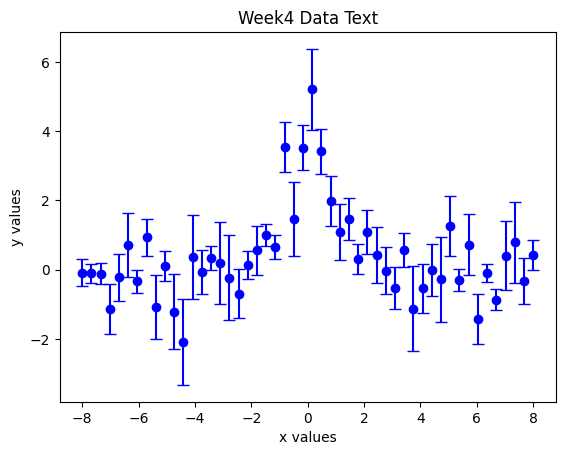

In [4]:
data = np.loadtxt('week4_data.txt', skiprows =1)
x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]
plt.errorbar(x, y, yerr, fmt = 'bo', capsize = 4)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Week4 Data Text')
plt.show()


**3. Plot data with error bars along with a model for the data**

a) (5 points) Use a text editor to look at the file `w4bdata.txt`, which contains some x, y data along with uncertainties for the y values. Make a plot of these data showing error bars for the uncertainties. Read in the data field using `Pandas` dataframe `df = pd.read_csv('w4bdata.txt')`. You will need to import the pandas package `import pandas as pd` first, then follow the Week 3 notes to extract the data.

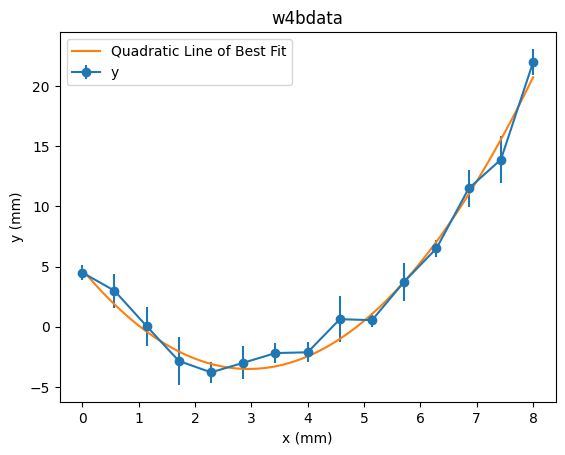

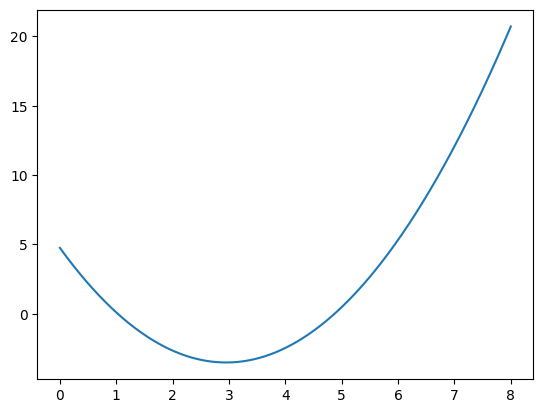

In [5]:
def quadratic(a, b, c, X):
    #takes the form a + bx +cx^2
    return a+b*X + c*X*X

df = pd.read_csv('w4bdata.csv')
df.plot(x='x', y='y', yerr='yerr', marker='o', linestyle='-')
coefficients = np.polyfit(df['x'], df['y'], 2, w=1/df['yerr'])
Y = np.poly1d(coefficients)
X = np.linspace(df['x'].min(), df['x'].max(), 1000)
# instead of poly1d and polyfit I couldve used quadratic and just guessed and checked over and over
plt.plot(X, Y(X), label = 'Quadratic Line of Best Fit')
plt.legend()
plt.title('w4bdata')
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.show()
plt.figure()
plt.plot(X, Y(X), label = 'Quadratic Line of Best Fit')



b) (5 points) What model polynomial function might reasonably describe the data? Write this as a user defined function, make a reasoned guess at what the model parameters should be, and plot the model as a smooth curve on the same graph as the data.

**4. Model data with error bars using curve fitting**


a) (10 points) Write user-defined fitting functions for polynomials of order 1-3, and make coefficients of these polynomials part of the
function call.

In [ ]:
def poly(degree, *args):
    '''if degree != len(args)-1:
        raise ValueError(f"To create a polynomial of degree {degree} you must input {degree+1} coefficients")'''
    def polyFunc(X):
        retVal =0
        for i, c in enumerate(args):
            retVal += (c*(X**i))
        return retVal
    return polyFunc

def poly2(X, *params):
    X = np.asarray(X)
    return sum(c * X**i for i, c in enumerate(params))



    

b) (10 points) Fit the data in the file `w4bdata.txt` to the polynomial functions of linear, quadratic and cubic order that you have defined in part (a) using `scipy.optimize.curvefit()`.  Use the uncertainties in the data in your fit, using the `sigma` keyword in `curvefit()`.  In each case, make a plot of this data showing error bars for the uncertainties along with the fitting function. Output the fitting parameters along with their uncertainties.

<Figure size 640x480 with 0 Axes>

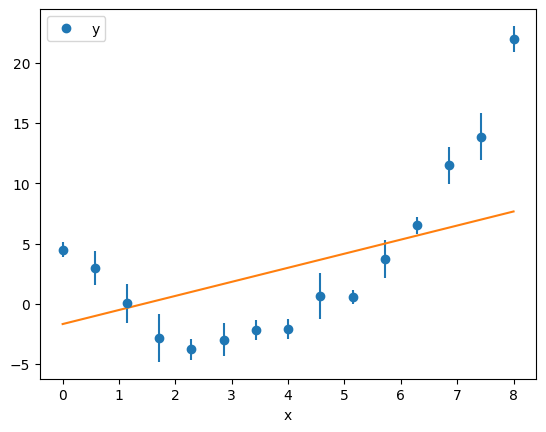

The reduced chi squre is 34.89861008457779
The parameters are [-1.68814608  1.16870947], and the uncertainties are [2.79775315 0.61872312], respctively


<Figure size 640x480 with 0 Axes>

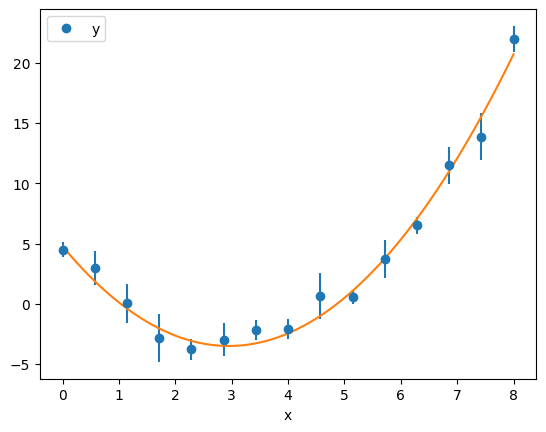

The reduced chi squre is 0.6694809080810952
The parameters are [ 4.75577295 -5.60312899  0.94983992], and the uncertainties are [0.46101871 0.27610564 0.03681489], respctively


<Figure size 640x480 with 0 Axes>

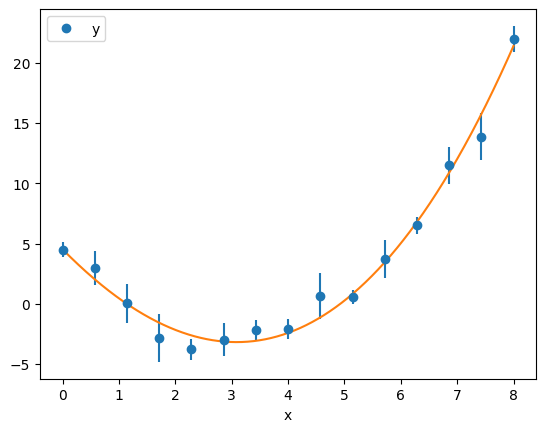

The reduced chi squre is 0.5958277420095688
The parameters are [ 4.51294774 -4.74293252  0.64759163  0.0261743 ], and the uncertainties are [0.4614101  0.60481697 0.19491644 0.01660939], respctively


In [20]:
def optimize(degree):
    initialGuess = np.ones(degree+1)
    popt, pcov = scipy.optimize.curve_fit(poly2, df['x'], df['y'], p0=initialGuess, sigma = df['yerr'])
    yfit = poly2(df['x'], *popt)
    residuals = (df['y'] - yfit)/df['yerr']
    dof = len(df['x'])- (degree+1)
    chi2 = np.sum(residuals ** 2)
    redChi2 = chi2/dof
    return popt, pcov, redChi2

def plotOptimized(degree):
    popt, pcov, redChi2 = optimize(degree)
    perr = np.sqrt(np.diag(pcov))
    X_fit = np.linspace(df['x'].min(), df['x'].max(), 1000)
    Y_fit = poly2(X_fit, *popt)
    plt.figure()
    df.plot(x='x', y='y', yerr='yerr', fmt='o')
    plt.plot(X_fit, Y_fit)
    plt.show()
    print(f"The reduced chi squre is {redChi2}")
    print(f"The parameters are {popt}, and the uncertainties are {perr}, respctively")
    
plotOptimized(1)
plotOptimized(2)
plotOptimized(3)


c) (5 points) Print out reduced chisquared values for each fit, and compare these to decide what order polynomial best fits this data.

The chi_squared of a second degree function is closest to the value of 1, so this one would be the best fit

**5. Plot residuals.**

(5 points) This continues Activity 4 and should
use the same data file. Make a figure with two subplots, one showing
the data and model as above, and the second showing the residuals
(difference between each data point and the model, along with error
bars).

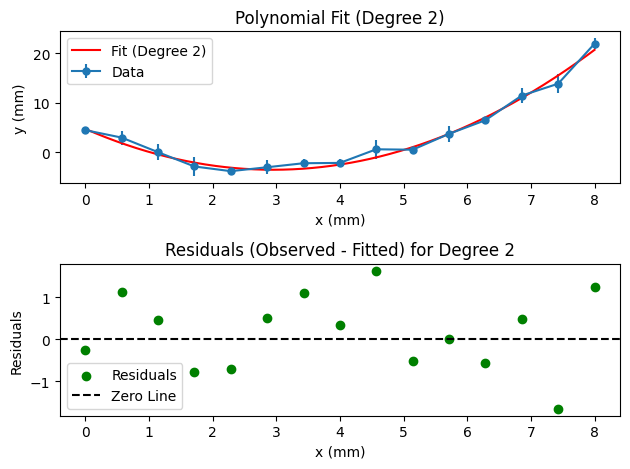

The reduced chi-squared is 0.669
The fitting parameters are [ 4.75577295 -5.60312899  0.94983992], and the uncertainties are [0.46101871 0.27610564 0.03681489], respectively


In [8]:
def plotOptimized(degree):
    """Plots the data and the polynomial fit for the specified degree, and the residuals"""
    popt, pcov, redChi2= optimize(degree)
    perr = np.sqrt(np.diag(pcov))
    X_fit = np.linspace(df['x'].min(), df['x'].max(), 1000)
    Y_fit = poly2(X_fit, *popt)
    
    fig, axs = plt.subplots(2, 1)
    
    axs[0].errorbar(df['x'], df['y'], yerr=df['yerr'], fmt='o', label='Data', linestyle='-', markersize=5)
    axs[0].plot(X_fit, Y_fit, label=f'Fit (Degree {degree})', color='red')
    axs[0].set_title(f"Polynomial Fit (Degree {degree})")
    axs[0].set_xlabel("x (mm)")
    axs[0].set_ylabel("y (mm)")
    axs[0].legend()

    yfit = poly2(df['x'], *popt)
    residuals = df['y'] - yfit
    axs[1].scatter(df['x'], residuals, label='Residuals', color='green')
    axs[1].axhline(0, color='black', linestyle='--', label="Zero Line")
    axs[1].set_title(f"Residuals (Observed - Fitted) for Degree {degree}")
    axs[1].set_xlabel("x (mm)")
    axs[1].set_ylabel("Residuals")
    axs[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Print results
    print(f"The reduced chi-squared is {redChi2:.3f}")
    print(f"The fitting parameters are {popt}, and the uncertainties are {perr}, respectively")

        
plotOptimized(2)

**6. More polynomial fits to data**

(10 points) Fit the data in the file `data2.txt` to polynomials of various orders, and use the reduced chisquared results to decide what model (what order polynomial) is justified for fitting this data. Once again, use the function `scipy.optimize.curve_fit()` as described in the section labeled “Nonlinear least-squares fitting” in the handout **Fitting models to data**. Output the fitting parameters along with their uncertainties.

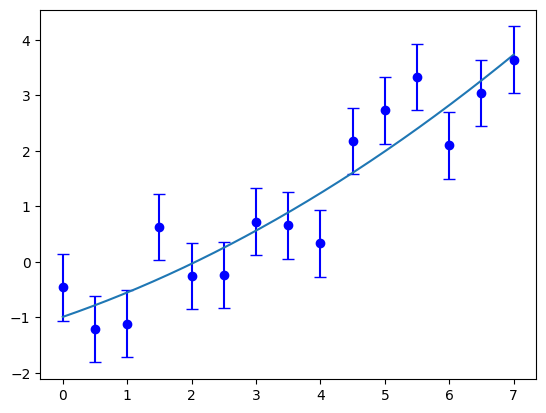

1.198463281128658
The parameters are: -0.9895033395763487 0.4005239147939609 0.0392178938550528
The uncertainties are: 0.4477676375449577 0.2969140224786466 0.04090666586587032


In [9]:
from scipy.optimize import curve_fit

def optimize(file, degree):
    data = np.loadtxt(file, skiprows = 1)
    x = data[:, 0]
    y = data[:, 1]
    yerr = data[:, 2]
    initialGuess = np.ones(degree+1)
    popt, pcov = scipy.optimize.curve_fit(poly2, x, y, p0=initialGuess, sigma = yerr)
    yfit = poly2(x, *popt)
    residuals = (y - yfit)/yerr
    dof = len(x)- (degree+1)
    chi2 = np.sum(residuals ** 2)
    redChi2 = chi2/dof
    xFit = np.linspace(x.min(), x.max(), 1000)
    yFit = poly2(xFit, *popt)
    return x, y, yerr, popt, pcov, redChi2, xFit, yFit


x, y, yerr, popt, pcov, redChi2, xFit, yFit = optimize('data2.txt', 2)
plt.figure()
plt.errorbar(x, y, yerr, fmt = 'bo', capsize = 4)
plt.plot(xFit, yFit)
plt.plot()
plt.show()
perr = np.sqrt(np.diag(pcov))
print(redChi2)
print(f"The parameters are: ", end='')
print(*popt)
print(f"The uncertainties are: ", end = '')
print(*perr)


**7. Fit to data with unknown uncertainties**

(5 points) The file `data3.txt` has only two columns (x and y, but not yerr).If you have data with no uncertainties given, you can assume the $\sigma_j$  values are all equal to 1. You can either create an array `sigma` of the same length as the x and y arrays, or modify your program to assume $\sigma_j = 1$. Either way, fit the data to polynomials of various orders and decide what order
polynomial is justified as a model for the data. Plot the $x_j, y_j$ data as points or symbols without error bars. Output the fitting parameters along with their uncertainties.

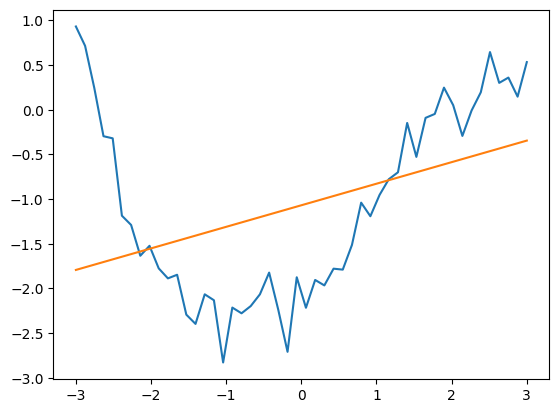

0.9755679505415037
The parameters are: -1.06915666 0.24135561330665845
The uncertainties are: 0.13968306600871241 0.07904895241578015


In [10]:
def optimize(data, degree):
    x = data[:, 0]
    y = data[:, 1]
    yerr = np.array(np.ones(len(y)))
    initialGuess = np.ones(degree+1)
    popt, pcov = scipy.optimize.curve_fit(poly2, x, y, p0=initialGuess, sigma = yerr)
    yfit = poly2(x, *popt)
    residuals = (y - yfit)/yerr
    dof = len(x)- (degree+1)
    chi2 = np.sum(residuals ** 2)
    redChi2 = chi2/dof
    xFit = np.linspace(x.min(), x.max(), 1000)
    yFit = poly2(xFit, *popt)
    return x, y, yerr, popt, pcov, redChi2, xFit, yFit

data3 = np.loadtxt('data3.txt', skiprows=1)
x, y, yerr, popt, pcov, redChi2, xFit, yFit = optimize(data3, 1)
plt.figure()
plt.plot(x, y)
plt.plot(xFit, yFit)
plt.plot()
plt.show()
perr = np.sqrt(np.diag(pcov))
print(redChi2)
print(f"The parameters are: ", end='')
print(*popt)
print(f"The uncertainties are: ", end = '')
print(*perr)

**8. Fitting data to a sine wave**

(10 points) Read in the data from the file `wavedata.txt` and plot it. Based on the plot, decide on a likely model for the data. Decide on how many parameters will be needed; define the model fit function, and write a program to fit your model to the data. Show both model and data on the same plot.

1.985000640944522 2.889370581387314 0.7016398275876096 3.0175091851568525


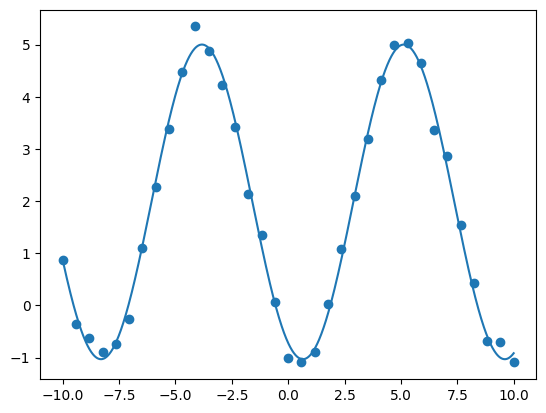

In [11]:
wavedata = np.loadtxt('wavedata.txt', skiprows = 1)
x = wavedata[:, 0]
y = wavedata[:, 1]
guess = [1, 1, 1, 1]
def wave(X, yshift, xshift, frequency, scale):
    X = np.asarray(X)
    return scale*np.sin(frequency*(X-xshift))+yshift
popt, pcov = curve_fit(wave, x, y, p0=guess)
xfit = np.linspace(-10, 10, 1000)
yfit = wave(xfit, *popt)
plt.scatter(x, y)
plt.plot(xfit, yfit)
print(*popt)

**9. The Madelung constant of an ionic solid** *(15 points)*

In an ionic crystal, the electrostatic energy experienced by a single ion is proportional to the Madelung constant, which is a geometrical quantity that depends on the structure of the crystal lattice.  In this problem, you will calculate the Madelung constant for a salt crystal, NaCl, where the alternating sodium and chlorine atoms sit equally spaced on a cubic grid (i.e. form a simple cubic lattice, see image below). The sodium ions are positive, and the chlorine ions are negative. Let $a$ be the lattice spacing, the separation between neighboring ions. Let $(i,j,k)$ be indices referring to the $(x,y,z)$ coordinates of each ion in crystal. The energy of an ion at the origin is then given by:
$$
V(i,j,k) =  C{(-1)^{i + j + k}\over\sqrt{i^2+j^2+k^2}},
$$
where $C$ is a constant inversely proportional to $a$ ($C = {e\over{(4\pi \epsilon_0 a)}}$).

The sum of this quantity for a cubical box centered around the origin is defined as the Madelung constant:
$$
M = \sum_{\substack{i,j,k=-L\\ \textrm{But not }i=j=k=0!}}^L
                   \hspace{-0.5em} {(-1)^{i + j + k}\over\sqrt{i^2+j^2+k^2}}
$$
You will do this for a lattice of finite size $L$, in which all three coordinates go from $-L$ to $L$. As stated in the summation symbol, avoid the origin $i = j = k = 0$ to avoid dividing by zero. Note also that in calculating the Madelung constant, you ignore the dimensional prefactor $C = \frac{e}{4\pi\epsilon_0 a}$.

In [12]:
'''from google.colab import files
_ = files.upload()'''


def medlung(L):
    count = 0
    list = np.arange(-L, L+1)
    for i in list:
        for j in list:
            for k in list:
                if i==0 and j==0 and k==0:
                    continue
                else:
                    count+=((-1)**(np.abs(i+j+k)))/(np.sqrt(i*i + j*j + k*k))
    return count

print(medlung(10))




-1.6925789282594415


In [13]:
'''import matplotlib.pyplot as plt
nacl = plt.imread('nacl.gif')
plt.imshow(nacl)
plt.show()'''

"import matplotlib.pyplot as plt\nnacl = plt.imread('nacl.gif')\nplt.imshow(nacl)\nplt.show()"

**10. Madelung constant: finite size effects**

(5 points) Choose a set of increasing L values, and use your previous program to plot how the Madelung constant changes as a function of lattice size $L$.

**11. 1D Random Walk in a restricted space**

In class, we discussed the unrestricted random walk in one dimension with `N` steps, and discussed repeating this walk `Ntrials` times.

Write code to carry out a **restricted** one dimensional random walk with the following rules:
- The walker starts at the origin, $x = 0$.
- The limits of the walk are $x = -50$ to $x = +50$. This means that if the walker position $x <= -50$, you always have to step to the right, i.e. add 1 to $x$. Alternatively, if the walker position $x >= +50$, you always have to go 1 step to the left, i.e. subtract 1 from $x$. If neither of these conditions are met, you will randomly add 1 or subtract 1. Keep track of the final position $x$ of the walker after $N$ steps.

a. *(10 points)* Carry out Ntrials = 1000 for $N$ = 100 and then 10,000 steps. In each case, find the mean $<x>$ and root mean squared displacement $\sqrt{<(\Delta x)^2>} = \sqrt{\bar{x^2} - \bar{x}^2}$. How do these measures vary with $N$?

b. *(5 points)* Generate a histogram of the final positions of the walker for each N value. What is the shape of this distribution?



In [14]:
import numpy as np

def walk1(initial_position, n_steps):
    x = initial_position
    rng = np.random.default_rng()
    
    for i in range(n_steps):
        if x == -50:
            step = 1
        elif x == 50:
            step = -1
        else:
            step = rng.choice([-1, 1])
        x += step
        
    return x

def run_trials(n_trials, n_steps):
    results = np.array([walk1(0, n_steps) for _ in range(n_trials)])
    mean_val = np.mean(results)
    rms_val = np.sqrt(np.mean(results**2))
    return mean_val, rms_val, results

mean_100, rms_100, data100 = run_trials(1000, 100)




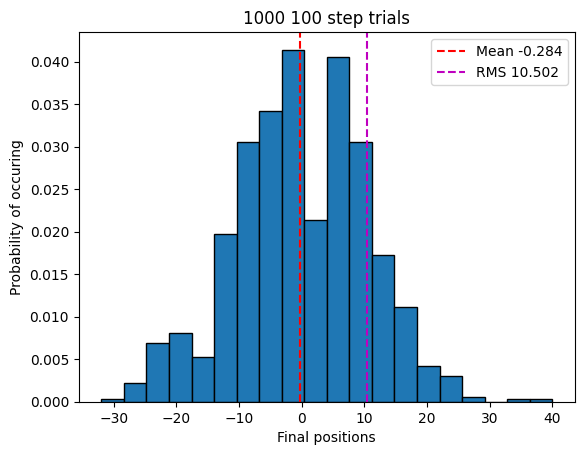

In [15]:
plt.figure()
plt.hist(data100, edgecolor = 'black', bins = 20, density = True)
plt.axvline(mean_100, color = 'r', linestyle='--', label =f"Mean {mean_100}")
plt.axvline(rms_100, color = 'm', linestyle = '--', label = f'RMS {rms_100:.3f}')
plt.legend()
plt.title("1000 100 step trials")
plt.xlabel("Final positions")
plt.ylabel("Probability of occuring")
plt.show()

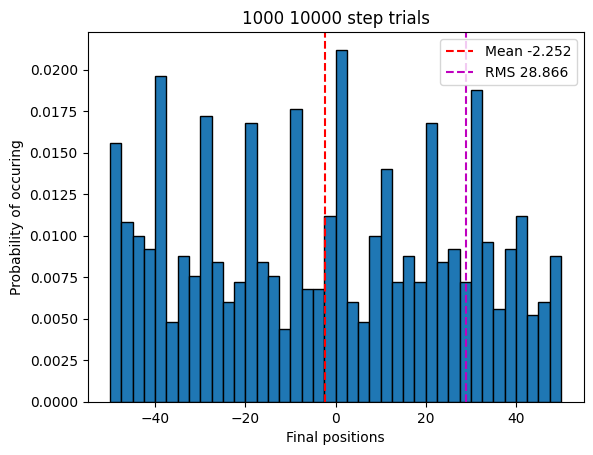

In [16]:
mean_10000, rms_10000, data10000 = run_trials(1000, 10000)
plt.figure()
plt.hist(data10000, edgecolor = 'black', bins = 40, density = True)
plt.axvline(mean_10000, color = 'r', linestyle='--', label =f"Mean {mean_10000}")
plt.axvline(rms_10000, color = 'm', linestyle = '--', label = f'RMS {rms_10000:.3f}')
plt.legend()
plt.title("1000 10000 step trials")
plt.xlabel("Final positions")
plt.ylabel("Probability of occuring")
plt.show()

**12.Unrestricted 1D Random Walk with steps drawn from a Gaussian distribution**

Write code to carry out an unrestricted random walk of $N$ steps in 1 dimension where each step is drawn from a Gaussian distribution centered at 0 and with width 1, i.e. use `rng.normal(0, 1, ...)`. Each distinct walk begins at the origin $x = 0$. As in the previous problem, repeat the $N$ step walk `Ntrials` times, and keep track of the final position $x$ of the walker after each trial.  *(Hint: you may be able to find this final position more easily if you generate $N$ random numbers at once)*.

a. *(5 points)* Carry out Ntrials = 1000 for $N$ = 100 and then 10,000 steps. In each case, find the mean $<x>$ and root mean squared displacement $(\Delta x)^2 = <x^2> - <x>^2$. How do these measures vary with $N$?

b. *(5 points)* Generate a histogram of the final positions of the walker for each N value. What is the shape of this distribution? You may need to increase the number of bins to see the shape clearly.

**13.1D Random Walk with steps drawn from a Cauchy distribution** *(15 points)*

Write code to carry out an unrestricted random walk of $N$ steps in 1 dimension where each step is drawn from a Lorentzian or Cauchy distribution:  use `rng.standard_cauchy(N)`. Each distinct walk begins at the origin $x = 0$. As in the previous problem, repeat the $N$ step walk `Ntrials` times, and keep track of the final position $x$ of the walker after each trial.  Generate a histogram of the final positions of the walker for each $N$ value. How does the shape of this distribution compare with the Gaussian in the previous problem?

**Programming notes:** it will not be easy to see the shape of this distribition without cutomizing the locations of the bin edges in your histogram. Use the following commands:

`
edges = np.linspace(lower,upper,100)
`

`
plt.hist(xfinal,bins = edges, rwidth = 0.9)
`

where `lower` and `upper` are values you set so that you may suitably view the shape of the distribution.